# 1. 인공신경망 (Artificial Neural Network)

### 개념
1. 사람의 신경망을 본떠 만든 네트워크 구조

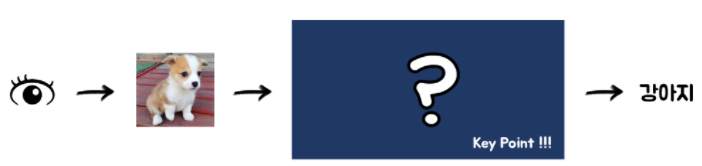

2. 즉, 어떠한 신호를 받고 전달하는 과정을 반복하여 최종적으로 결과를 도출하는 사람의 학습 방법을 기계에 적용한 것

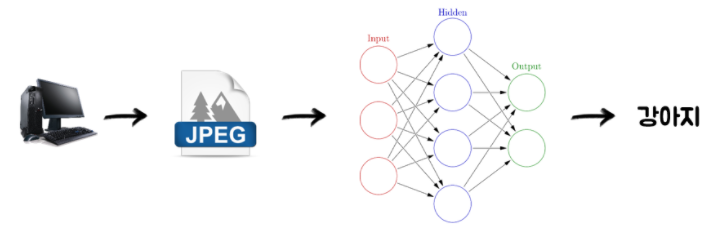

3. 입력층, 은닉층, 출력층으로 구성되어있음

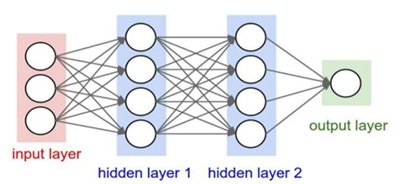  

4. Backpropagation 과정을 통해 매 epoch마다 가중치를 새롭게 업데이트함
5. 은닉층이 깊어질수록 Backpropagation 시 기울기가 소멸되는 위험이 있음


### 인공신경망의 발전 과정
1. 최초에는 입력층과 출력층만 가지고 있는 TLU 형태의 퍼셉트론의 모습이었음 (은닉층 X)
2. 그러나 퍼셉트론은 XOR과 같은 문제를 해결할 수 없는 한계가 있었음
3. XOR 문제와 같은 한계를 해결하기 위해, 은닉층이 추가된 현재의 인공신경망의 모습이 되었음
4. 현재는 인공신경망을 통해 이미지, 자연어 등의 다양한 분야의 문제를 해결할 수 있음

# 2. 실습

### 필요한 모듈 Import

In [1]:
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

### 데이터 탐색

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
#891행의 데이터셋, 변수는 총 12개
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#결측값 확인결과, Age, Cabin, Embarked에 결측값이 존재함을 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터 시각화

Count of not survived: 549
Count of survived: 342


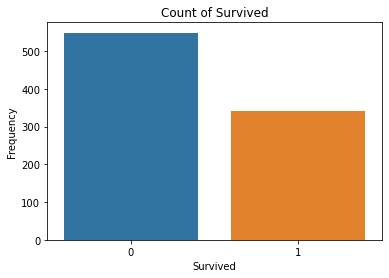

In [6]:
#여성이 남성보다 생존율이 높음을 확인
ax1 = plt.subplots()
ax1 = sns.countplot(titanic['Survived'])
ax1.set_title('Count of Survived')
ax1.set_xlabel('Survived')
ax1.set_ylabel('Frequency')

print("Count of not survived:", sum(titanic["Survived"]==0))
print("Count of survived:", sum(titanic["Survived"]==1))

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


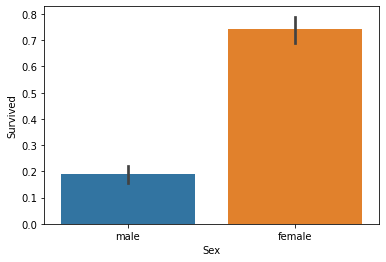

In [7]:
#여성이 남성보다 생존율이 높음을 확인
sns.barplot(x="Sex", y="Survived", data=titanic)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


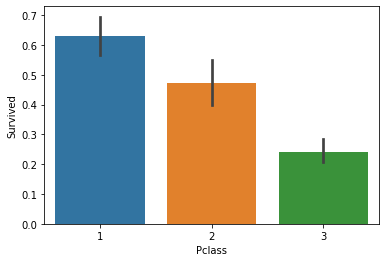

In [8]:
#등급이 높을수록 살아남을 확률이 높음을 확인
sns.barplot(x="Pclass", y="Survived", data=titanic)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


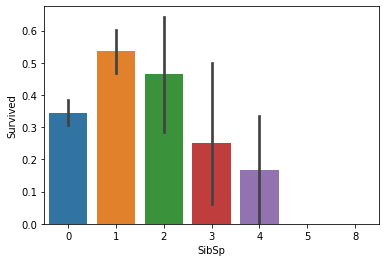

In [9]:
#많은 형제, 자매나 배우자와 함께 여행했을수록 생존할 확률이 낮음
sns.barplot(x="SibSp", y="Survived", data=titanic)

print("Percentage of SibSp = 0 who survived:", titanic["Survived"][titanic["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", titanic["Survived"][titanic["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", titanic["Survived"][titanic["SibSp"] == 2].value_counts(normalize = True)[1]*100)

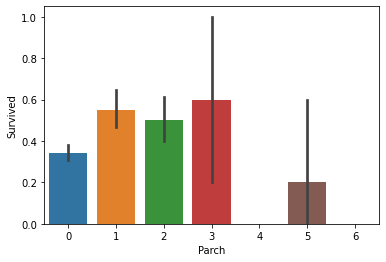

In [10]:
#부모나 자식이 4명보다 적은 사람의 생존 확률이 더 높음
sns.barplot(x="Parch", y="Survived", data=titanic)
plt.show()

### 결측값 처리

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


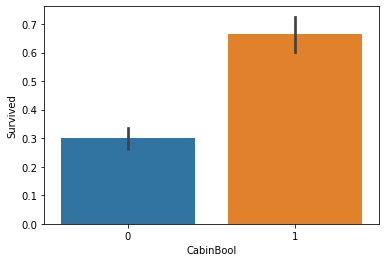

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", titanic["Survived"][titanic["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", titanic["Survived"][titanic["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=titanic)
plt.show()

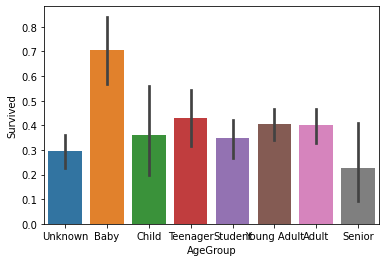

In [12]:
#나이를 범주로 묶어서 결측값을 하나의 범주로 설정
#아기의 경우, 70% 정도의 높은 생존율을 보임을 확인

titanic["Age"] = titanic["Age"].fillna(-0.6)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()

In [13]:
#Embarked 변수의 경우 결측값이 2개밖에 존재하지 않으므로 해당 행을 삭제
titanic = titanic[titanic['Embarked'].isnull() == False]

In [14]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.6,1,2,W./C. 6607,23.4500,NaN,S,0,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Young Adult


### 불필요한 변수 제거

In [15]:
#PassengerId, Name, Age, Ticket, Cabin 변수는 분석에 불필요한 변수로 판단하여 제거
#Age와 Cabin의 경우, AgeGroup과 CabinBool 변수가 역할을 대신함

titanic = titanic.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'], axis = 1)
titanic

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,0,3,male,1,0,7.2500,S,0,Student
1,1,1,female,1,0,71.2833,C,1,Adult
2,1,3,female,0,0,7.9250,S,0,Young Adult
3,1,1,female,1,0,53.1000,S,1,Young Adult
4,0,3,male,0,0,8.0500,S,0,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,0,Young Adult
887,1,1,female,0,0,30.0000,S,1,Student
888,0,3,female,1,2,23.4500,S,0,Unknown
889,1,1,male,0,0,30.0000,C,1,Young Adult


### 더미변수화

In [16]:
titanic = pd.get_dummies(titanic, drop_first = True)
titanic

,Survived,Pclass,SibSp,Parch,Fare,CabinBool,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,1,0,7.2500,0,1,0,1,0,0,0,1,0,0,0
1,1,1,1,0,71.2833,1,0,0,0,0,0,0,0,0,1,0
2,1,3,0,0,7.9250,0,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,53.1000,1,0,0,1,0,0,0,0,1,0,0
4,0,3,0,0,8.0500,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,1,0,1,0,0,0,0,1,0,0
887,1,1,0,0,30.0000,1,0,0,1,0,0,0,1,0,0,0
888,0,3,1,2,23.4500,0,0,0,1,0,0,0,0,0,0,0
889,1,1,0,0,30.0000,1,1,0,0,0,0,0,0,1,0,0


In [17]:
titanic.describe(include = 'all')

,Survived,Pclass,SibSp,Parch,Fare,CabinBool,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,0.227222,0.649044,0.086614,0.724409,0.049494,0.028121,0.078740,0.155231,0.247469,0.218223,0.023622
std,0.486260,0.834700,1.103705,0.806761,49.697504,0.419273,0.477538,0.281427,0.447063,0.217019,0.165413,0.269484,0.362328,0.431784,0.413272,0.151954
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 데이터 분할

In [18]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['Survived'], axis=1)
target = titanic["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, random_state = 502)

### Muliple Layer Perceptron (Epoch별)

In [19]:
# MLP (Epoch=100, Layer=2)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 1.5851 - acc: 0.4019 - val_loss: 1.1907 - val_acc: 0.3858
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0288 - acc: 0.4019 - val_loss: 0.8068 - val_acc: 0.3858
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7369 - acc: 0.4051 - val_loss: 0.6860 - val_acc: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.4371 - acc: 0.8055 - val_loss: 0.4605 - val_acc: 0.7903
Epoch 58/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4314 - acc: 0.8071 - val_loss: 0.5513 - val_acc: 0.7566
Epoch 59/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4440 - acc: 0.8119 - val_loss: 0.4529 - val_acc: 0.7940
Epoch 60/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4293 - acc: 0.8087 - val_loss: 0.4533 - val_acc: 0.7903
Epoch 61/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4304 - acc: 0.8199 - val_loss: 0.4666 - val_acc: 0.7828
Epoch 62/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4299 - acc: 0.8119 - val_loss: 0.5007 - val_acc: 0.7865
Epoch 63/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4319 - acc: 0.8183 - val_loss: 0.4532 - val_acc: 0.7978
Epoch 64/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4322 - acc: 0

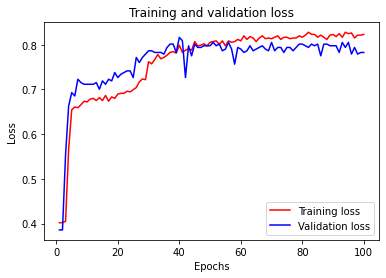

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
# MLP (Epoch=1000, Layer=2)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.7627 - acc: 0.5177 - val_loss: 0.6441 - val_acc: 0.6854
Epoch 2/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6604 - acc: 0.6254 - val_loss: 0.6168 - val_acc: 0.7079
Epoch 3/1000
20/20 [==============================] - ETA: 0s - loss: 0.7117 - acc: 0.562 - 0s 1ms/step - loss: 0.6315 - a

Epoch 57/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4370 - acc: 0.8055 - val_loss: 0.4466 - val_acc: 0.7940
Epoch 58/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4239 - acc: 0.8199 - val_loss: 0.4463 - val_acc: 0.7940
Epoch 59/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4333 - acc: 0.8055 - val_loss: 0.4836 - val_acc: 0.7828
Epoch 60/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4297 - acc: 0.8215 - val_loss: 0.5259 - val_acc: 0.7603
Epoch 61/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4226 - acc: 0.8071 - val_loss: 0.4524 - val_acc: 0.7903
Epoch 62/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4240 - acc: 0.8119 - val_loss: 0.4804 - val_acc: 0.7828
Epoch 63/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4209 - acc: 0.8119 - val_loss: 0.4812 - val_acc: 0.7790
Epoch 64/1000
20/20 [==============================] - 0s 1ms/step - 

20/20 [==============================] - 0s 1ms/step - loss: 0.3956 - acc: 0.8280 - val_loss: 0.4409 - val_acc: 0.7940
Epoch 118/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4060 - acc: 0.8248 - val_loss: 0.5348 - val_acc: 0.7753
Epoch 119/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4062 - acc: 0.8248 - val_loss: 0.4470 - val_acc: 0.7940
Epoch 120/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3922 - acc: 0.8312 - val_loss: 0.4443 - val_acc: 0.7940
Epoch 121/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.4045 - acc: 0.8280 - val_loss: 0.4493 - val_acc: 0.7903
Epoch 122/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3983 - acc: 0.8296 - val_loss: 0.4571 - val_acc: 0.7903
Epoch 123/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3918 - acc: 0.8328 - val_loss: 0.5257 - val_acc: 0.7753
Epoch 124/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

Epoch 178/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3869 - acc: 0.8312 - val_loss: 0.4475 - val_acc: 0.7978
Epoch 179/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3707 - acc: 0.8360 - val_loss: 0.4503 - val_acc: 0.7903
Epoch 180/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3757 - acc: 0.8441 - val_loss: 0.4690 - val_acc: 0.7940
Epoch 181/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3899 - acc: 0.8215 - val_loss: 0.4861 - val_acc: 0.7865
Epoch 182/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3774 - acc: 0.8457 - val_loss: 0.4787 - val_acc: 0.7903
Epoch 183/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3771 - acc: 0.8441 - val_loss: 0.4646 - val_acc: 0.7828
Epoch 184/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3847 - acc: 0.8360 - val_loss: 0.4473 - val_acc: 0.8015
Epoch 185/1000
20/20 [==============================] - 0s 1ms

20/20 [==============================] - 0s 1ms/step - loss: 0.3756 - acc: 0.8392 - val_loss: 0.4721 - val_acc: 0.7790
Epoch 240/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3719 - acc: 0.8457 - val_loss: 0.4725 - val_acc: 0.7828
Epoch 241/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3831 - acc: 0.8312 - val_loss: 0.4652 - val_acc: 0.7903
Epoch 242/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3701 - acc: 0.8424 - val_loss: 0.4601 - val_acc: 0.7865
Epoch 243/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3819 - acc: 0.8344 - val_loss: 0.4806 - val_acc: 0.7828
Epoch 244/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3647 - acc: 0.8424 - val_loss: 0.4815 - val_acc: 0.7865
Epoch 245/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3734 - acc: 0.8424 - val_loss: 0.4718 - val_acc: 0.7828
Epoch 246/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

20/20 [==============================] - 0s 1ms/step - loss: 0.3626 - acc: 0.8424 - val_loss: 0.4696 - val_acc: 0.8015
Epoch 301/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3633 - acc: 0.8424 - val_loss: 0.4707 - val_acc: 0.7865
Epoch 302/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3741 - acc: 0.8457 - val_loss: 0.4739 - val_acc: 0.7978
Epoch 303/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3634 - acc: 0.8473 - val_loss: 0.5013 - val_acc: 0.7753
Epoch 304/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3610 - acc: 0.8537 - val_loss: 0.4868 - val_acc: 0.7940
Epoch 305/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3699 - acc: 0.8424 - val_loss: 0.4663 - val_acc: 0.8015
Epoch 306/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3683 - acc: 0.8424 - val_loss: 0.4783 - val_acc: 0.7865
Epoch 307/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

Epoch 361/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3519 - acc: 0.8473 - val_loss: 0.4769 - val_acc: 0.7940
Epoch 362/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3640 - acc: 0.8408 - val_loss: 0.4730 - val_acc: 0.7978
Epoch 363/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3533 - acc: 0.8441 - val_loss: 0.6244 - val_acc: 0.7678
Epoch 364/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3629 - acc: 0.8473 - val_loss: 0.5177 - val_acc: 0.7940
Epoch 365/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3533 - acc: 0.8473 - val_loss: 0.4822 - val_acc: 0.7940
Epoch 366/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3640 - acc: 0.8408 - val_loss: 0.4820 - val_acc: 0.7940
Epoch 367/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3519 - acc: 0.8553 - val_loss: 0.4794 - val_acc: 0.8015
Epoch 368/1000
20/20 [==============================] - 0s 1ms

Epoch 422/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3513 - acc: 0.8537 - val_loss: 0.5679 - val_acc: 0.7828
Epoch 423/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3534 - acc: 0.8424 - val_loss: 0.5035 - val_acc: 0.7640
Epoch 424/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3502 - acc: 0.8489 - val_loss: 0.6161 - val_acc: 0.7790
Epoch 425/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3585 - acc: 0.8441 - val_loss: 0.5236 - val_acc: 0.7640
Epoch 426/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3506 - acc: 0.8489 - val_loss: 0.4904 - val_acc: 0.7715
Epoch 427/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3570 - acc: 0.8473 - val_loss: 0.4872 - val_acc: 0.7978
Epoch 428/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3574 - acc: 0.8505 - val_loss: 0.5039 - val_acc: 0.7940
Epoch 429/1000
20/20 [==============================] - 0s 1ms

Epoch 483/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3408 - acc: 0.8505 - val_loss: 0.5174 - val_acc: 0.8015
Epoch 484/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3495 - acc: 0.8505 - val_loss: 0.5160 - val_acc: 0.7978
Epoch 485/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3388 - acc: 0.8617 - val_loss: 0.5500 - val_acc: 0.7603
Epoch 486/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3422 - acc: 0.8441 - val_loss: 0.5512 - val_acc: 0.7678
Epoch 487/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3367 - acc: 0.8489 - val_loss: 0.5458 - val_acc: 0.7678
Epoch 488/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3428 - acc: 0.8617 - val_loss: 0.5925 - val_acc: 0.7640
Epoch 489/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3473 - acc: 0.8505 - val_loss: 0.5322 - val_acc: 0.7640
Epoch 490/1000
20/20 [==============================] - 0s 1ms

20/20 [==============================] - 0s 1ms/step - loss: 0.3302 - acc: 0.8569 - val_loss: 0.5895 - val_acc: 0.7903
Epoch 544/1000
20/20 [==============================] - ETA: 0s - loss: 0.2204 - acc: 0.968 - 0s 1ms/step - loss: 0.3314 - acc: 0.8650 - val_loss: 0.6489 - val_acc: 0.7828
Epoch 545/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3400 - acc: 0.8617 - val_loss: 0.5554 - val_acc: 0.7978
Epoch 546/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3442 - acc: 0.8457 - val_loss: 0.5767 - val_acc: 0.7903
Epoch 547/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3379 - acc: 0.8585 - val_loss: 0.6637 - val_acc: 0.7828
Epoch 548/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3300 - acc: 0.8682 - val_loss: 0.5382 - val_acc: 0.7828
Epoch 549/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3450 - acc: 0.8489 - val_loss: 0.5376 - val_acc: 0.7903
Epoch 550/1000
20/20 [=================

20/20 [==============================] - 0s 1ms/step - loss: 0.3329 - acc: 0.8569 - val_loss: 0.5541 - val_acc: 0.7940
Epoch 604/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3331 - acc: 0.8650 - val_loss: 0.5491 - val_acc: 0.7828
Epoch 605/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3267 - acc: 0.8505 - val_loss: 0.5983 - val_acc: 0.7903
Epoch 606/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3268 - acc: 0.8682 - val_loss: 0.5732 - val_acc: 0.7640
Epoch 607/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3317 - acc: 0.8521 - val_loss: 0.5733 - val_acc: 0.7903
Epoch 608/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3237 - acc: 0.8650 - val_loss: 0.6641 - val_acc: 0.7828
Epoch 609/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3249 - acc: 0.8505 - val_loss: 0.5824 - val_acc: 0.7715
Epoch 610/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

Epoch 664/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3211 - acc: 0.8666 - val_loss: 0.5912 - val_acc: 0.7603
Epoch 665/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3155 - acc: 0.8650 - val_loss: 0.5812 - val_acc: 0.7678
Epoch 666/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3205 - acc: 0.8617 - val_loss: 0.6303 - val_acc: 0.7790
Epoch 667/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3328 - acc: 0.8569 - val_loss: 0.5804 - val_acc: 0.7678
Epoch 668/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3160 - acc: 0.8633 - val_loss: 0.5986 - val_acc: 0.7640
Epoch 669/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3241 - acc: 0.8601 - val_loss: 0.5824 - val_acc: 0.7790
Epoch 670/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3151 - acc: 0.8617 - val_loss: 0.6655 - val_acc: 0.7753
Epoch 671/1000
20/20 [==============================] - 0s 1ms

20/20 [==============================] - 0s 1ms/step - loss: 0.3187 - acc: 0.8682 - val_loss: 0.6409 - val_acc: 0.7753
Epoch 726/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3118 - acc: 0.8762 - val_loss: 0.6367 - val_acc: 0.7678
Epoch 727/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3180 - acc: 0.8617 - val_loss: 0.7510 - val_acc: 0.7978
Epoch 728/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3116 - acc: 0.8762 - val_loss: 0.6764 - val_acc: 0.7603
Epoch 729/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3172 - acc: 0.8666 - val_loss: 0.7081 - val_acc: 0.7865
Epoch 730/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3178 - acc: 0.8730 - val_loss: 0.6596 - val_acc: 0.7790
Epoch 731/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3198 - acc: 0.8617 - val_loss: 0.6502 - val_acc: 0.7715
Epoch 732/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

20/20 [==============================] - 0s 1ms/step - loss: 0.3080 - acc: 0.8746 - val_loss: 0.6833 - val_acc: 0.7678
Epoch 787/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3024 - acc: 0.8810 - val_loss: 0.7290 - val_acc: 0.7753
Epoch 788/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3107 - acc: 0.8666 - val_loss: 0.7615 - val_acc: 0.7790
Epoch 789/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3101 - acc: 0.8730 - val_loss: 0.6790 - val_acc: 0.7603
Epoch 790/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3064 - acc: 0.8714 - val_loss: 0.7531 - val_acc: 0.7790
Epoch 791/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3050 - acc: 0.8698 - val_loss: 0.6841 - val_acc: 0.7678
Epoch 792/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3100 - acc: 0.8633 - val_loss: 0.7047 - val_acc: 0.7753
Epoch 793/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

20/20 [==============================] - 0s 1ms/step - loss: 0.2971 - acc: 0.8794 - val_loss: 0.8528 - val_acc: 0.7790
Epoch 848/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3076 - acc: 0.8730 - val_loss: 0.8213 - val_acc: 0.7790
Epoch 849/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3012 - acc: 0.8794 - val_loss: 0.7314 - val_acc: 0.7715
Epoch 850/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3002 - acc: 0.8698 - val_loss: 0.7474 - val_acc: 0.7603
Epoch 851/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2993 - acc: 0.8810 - val_loss: 0.8064 - val_acc: 0.7566
Epoch 852/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3071 - acc: 0.8698 - val_loss: 0.7264 - val_acc: 0.7753
Epoch 853/1000
20/20 [==============================] - ETA: 0s - loss: 0.3928 - acc: 0.843 - 0s 1ms/step - loss: 0.3058 - acc: 0.8714 - val_loss: 0.7586 - val_acc: 0.7865
Epoch 854/1000
20/20 [=================

20/20 [==============================] - 0s 1ms/step - loss: 0.3038 - acc: 0.8794 - val_loss: 0.7618 - val_acc: 0.7640
Epoch 908/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2980 - acc: 0.8778 - val_loss: 0.7642 - val_acc: 0.7678
Epoch 909/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3028 - acc: 0.8810 - val_loss: 0.8187 - val_acc: 0.7790
Epoch 910/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2958 - acc: 0.8810 - val_loss: 0.7823 - val_acc: 0.7678
Epoch 911/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3032 - acc: 0.8714 - val_loss: 0.7956 - val_acc: 0.7753
Epoch 912/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3042 - acc: 0.8714 - val_loss: 0.7721 - val_acc: 0.7640
Epoch 913/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2975 - acc: 0.8730 - val_loss: 0.7781 - val_acc: 0.7715
Epoch 914/1000
20/20 [==============================] - 0s 2ms/step - loss: 0

20/20 [==============================] - 0s 1ms/step - loss: 0.2959 - acc: 0.8746 - val_loss: 0.8236 - val_acc: 0.7790
Epoch 969/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2995 - acc: 0.8730 - val_loss: 0.8429 - val_acc: 0.7828
Epoch 970/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3043 - acc: 0.8714 - val_loss: 0.8052 - val_acc: 0.7715
Epoch 971/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2893 - acc: 0.8826 - val_loss: 0.8230 - val_acc: 0.7715
Epoch 972/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2947 - acc: 0.8746 - val_loss: 0.8025 - val_acc: 0.7640
Epoch 973/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2958 - acc: 0.8810 - val_loss: 0.8923 - val_acc: 0.7715
Epoch 974/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2966 - acc: 0.8730 - val_loss: 0.8419 - val_acc: 0.7715
Epoch 975/1000
20/20 [==============================] - 0s 1ms/step - loss: 0

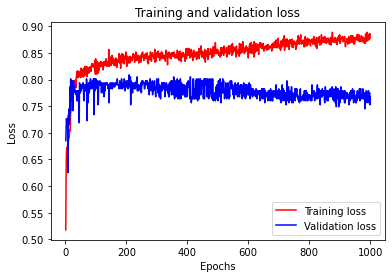

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Muliple Layer Perceptron (Layer별)

In [23]:
# MLP (Epoch=100, Layer=2)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6813 - acc: 0.6109 - val_loss: 0.6580 - val_acc: 0.6554
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6435 - acc: 0.6608 - val_loss: 0.6234 - val_acc: 0.7303
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6206 - acc: 0.6704 - val_loss: 0.6045 - val_acc: 

20/20 [==============================] - 0s 1ms/step - loss: 0.4142 - acc: 0.8183 - val_loss: 0.4548 - val_acc: 0.7753
Epoch 58/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4158 - acc: 0.8103 - val_loss: 0.4542 - val_acc: 0.7753
Epoch 59/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4167 - acc: 0.8135 - val_loss: 0.4551 - val_acc: 0.7753
Epoch 60/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4112 - acc: 0.8248 - val_loss: 0.5236 - val_acc: 0.7566
Epoch 61/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4142 - acc: 0.8280 - val_loss: 0.4590 - val_acc: 0.7865
Epoch 62/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4108 - acc: 0.8199 - val_loss: 0.4552 - val_acc: 0.7790
Epoch 63/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4091 - acc: 0.8215 - val_loss: 0.4572 - val_acc: 0.7865
Epoch 64/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4095 - acc: 0

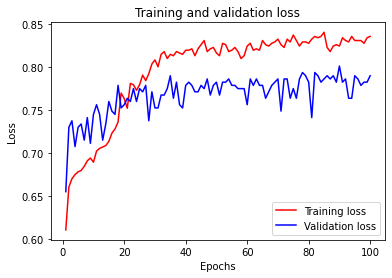

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# MLP (Epoch=100, Layer=10)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=60, validation_data=(x_val, y_val))
results = model.evaluate(x_val, y_val)
print(results)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 16)               

Epoch 49/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4339 - acc: 0.8199 - val_loss: 0.4945 - val_acc: 0.7640
Epoch 50/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4855 - acc: 0.7958 - val_loss: 0.5024 - val_acc: 0.7566
Epoch 51/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4229 - acc: 0.8248 - val_loss: 0.5001 - val_acc: 0.7528
Epoch 52/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4219 - acc: 0.8232 - val_loss: 0.5045 - val_acc: 0.7528
Epoch 53/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4409 - acc: 0.7990 - val_loss: 0.5899 - val_acc: 0.7154
Epoch 54/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4180 - acc: 0.8071 - val_loss: 0.5741 - val_acc: 0.7491
Epoch 55/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4416 - acc: 0.8071 - val_loss: 0.5637 - val_acc: 0.7491
Epoch 56/100
11/11 [==============================] - 0s 2ms/step - loss: 0.

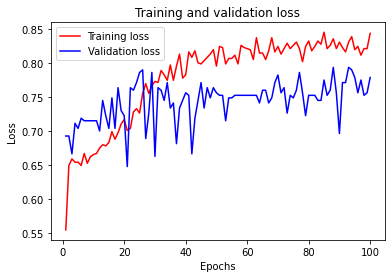

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 결론

#### 실습에 사용한 데이터는 타이타닉호 탑승자 데이터로, 승객에 대한 정보와 생존여부로 이루어진 형태의 데이터이다.

Epoch을 늘릴수록 Train Set에 대한 Accuracy가 계속해서 증가함을 확인할 수 있었다. 따라서 Epoch이 증가함에 따라 모델이 Train Set에 적합되어 가고 있음을 확인할 수 있다. 반면, Validation Set에 대한 Accuracy는 Epoch이 높아져도 어느순간부터 오히려 떨어지는 경향을 보였는데, Overfitting이 발생하였기 때문이라고 판단된다. Layer를 늘릴 경우에는 무조건 Layer가 깊다고해서, 혹은 얉다고해서 성능이 높고 낮지 않았다. Layer가 깊어지면 일반적으로 성능이 좋아지기 마련이지만 어느순간부터는 Backpropagation 시 기울기가 손실되는 문제가 발생하여 성능이 떨어지게 된다. 따라서 데이터의 특성을 고려한 최적의 Layer를 대입하는 것이 가장 좋은 성능을 이끌어 낼 것으로 판단된다. 